In [11]:
import pandas as pd
from pandas_profiling import ProfileReport
from persiantools.jdatetime import JalaliDate
from persiantools.jdatetime import JalaliDateTime
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
import seaborn as sns
import datetime, pytz
import math

In [15]:
Data=pd.read_excel("/home/hamid/Git Projects/Predictive maintenance in the gas industry/output.xls",dtype={'Type of blackout':"category", 'Affairs':"category",
       'Post above distribution':"category", 'feeder':"category",'Type of breaker':"category", 'Relay':"category", 'Cause of interruption':"category", 'Forms / details':"category",
       'Cause of the problem':"category"})
Data=Data.drop("Row",1)

In [16]:
time=list()
for i in Data['Disconnect the feeder or branch']:
    i=i.split()
    yeardaymonth=i[0].split("/")
    hourandminute=i[1].split(":")
    time.append(JalaliDateTime(int(yeardaymonth[0]),int(yeardaymonth[1]),int(yeardaymonth[2]),int(hourandminute[0]),int(hourandminute[1])).to_gregorian())
Data['Disconnect the feeder or branch']=time

In [17]:
time=list()
for i in Data['Connect the feeder or branch']:
    try:
        i=i.split()
        yeardaymonth=i[0].split("/")
        hourandminute=i[1].split(":")
        time.append(JalaliDateTime(int(yeardaymonth[0]),int(yeardaymonth[1]),int(yeardaymonth[2]),int(hourandminute[0]),int(hourandminute[1])).to_gregorian())
    except:
        time.append(float("NaN"))
Data['Connect the feeder or branch']=time

In [18]:
time=list()
for i in Data['Electrification time of the entire feeder path']:
    try:
        i=i.split()
        yeardaymonth=i[0].split("/")
        hourandminute=i[1].split(":")
        time.append(JalaliDateTime(int(yeardaymonth[0]),int(yeardaymonth[1]),int(yeardaymonth[2]),int(hourandminute[0]),int(hourandminute[1])).to_gregorian())
    except:
        time.append(float("NaN"))
Data['Electrification time of the entire feeder path']=time

In [20]:
print(Data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1649 entries, 0 to 1648
Data columns (total 17 columns):
 #   Column                                          Non-Null Count  Dtype         
---  ------                                          --------------  -----         
 0   Blackout number                                 1649 non-null   int64         
 1   Type of blackout                                1649 non-null   category      
 2   Affairs                                         1649 non-null   category      
 3   Post above distribution                         1649 non-null   category      
 4   feeder                                          1649 non-null   category      
 5   Current cut off                                 1649 non-null   float64       
 6   Type of breaker                                 1649 non-null   category      
 7   Relay                                           1649 non-null   category      
 8   Cause of interruption                           

In [21]:
ProfileReport(Data.drop(columns="Blackout number"))

Summarize dataset:   0%|          | 0/29 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

/home/hamid/snap/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


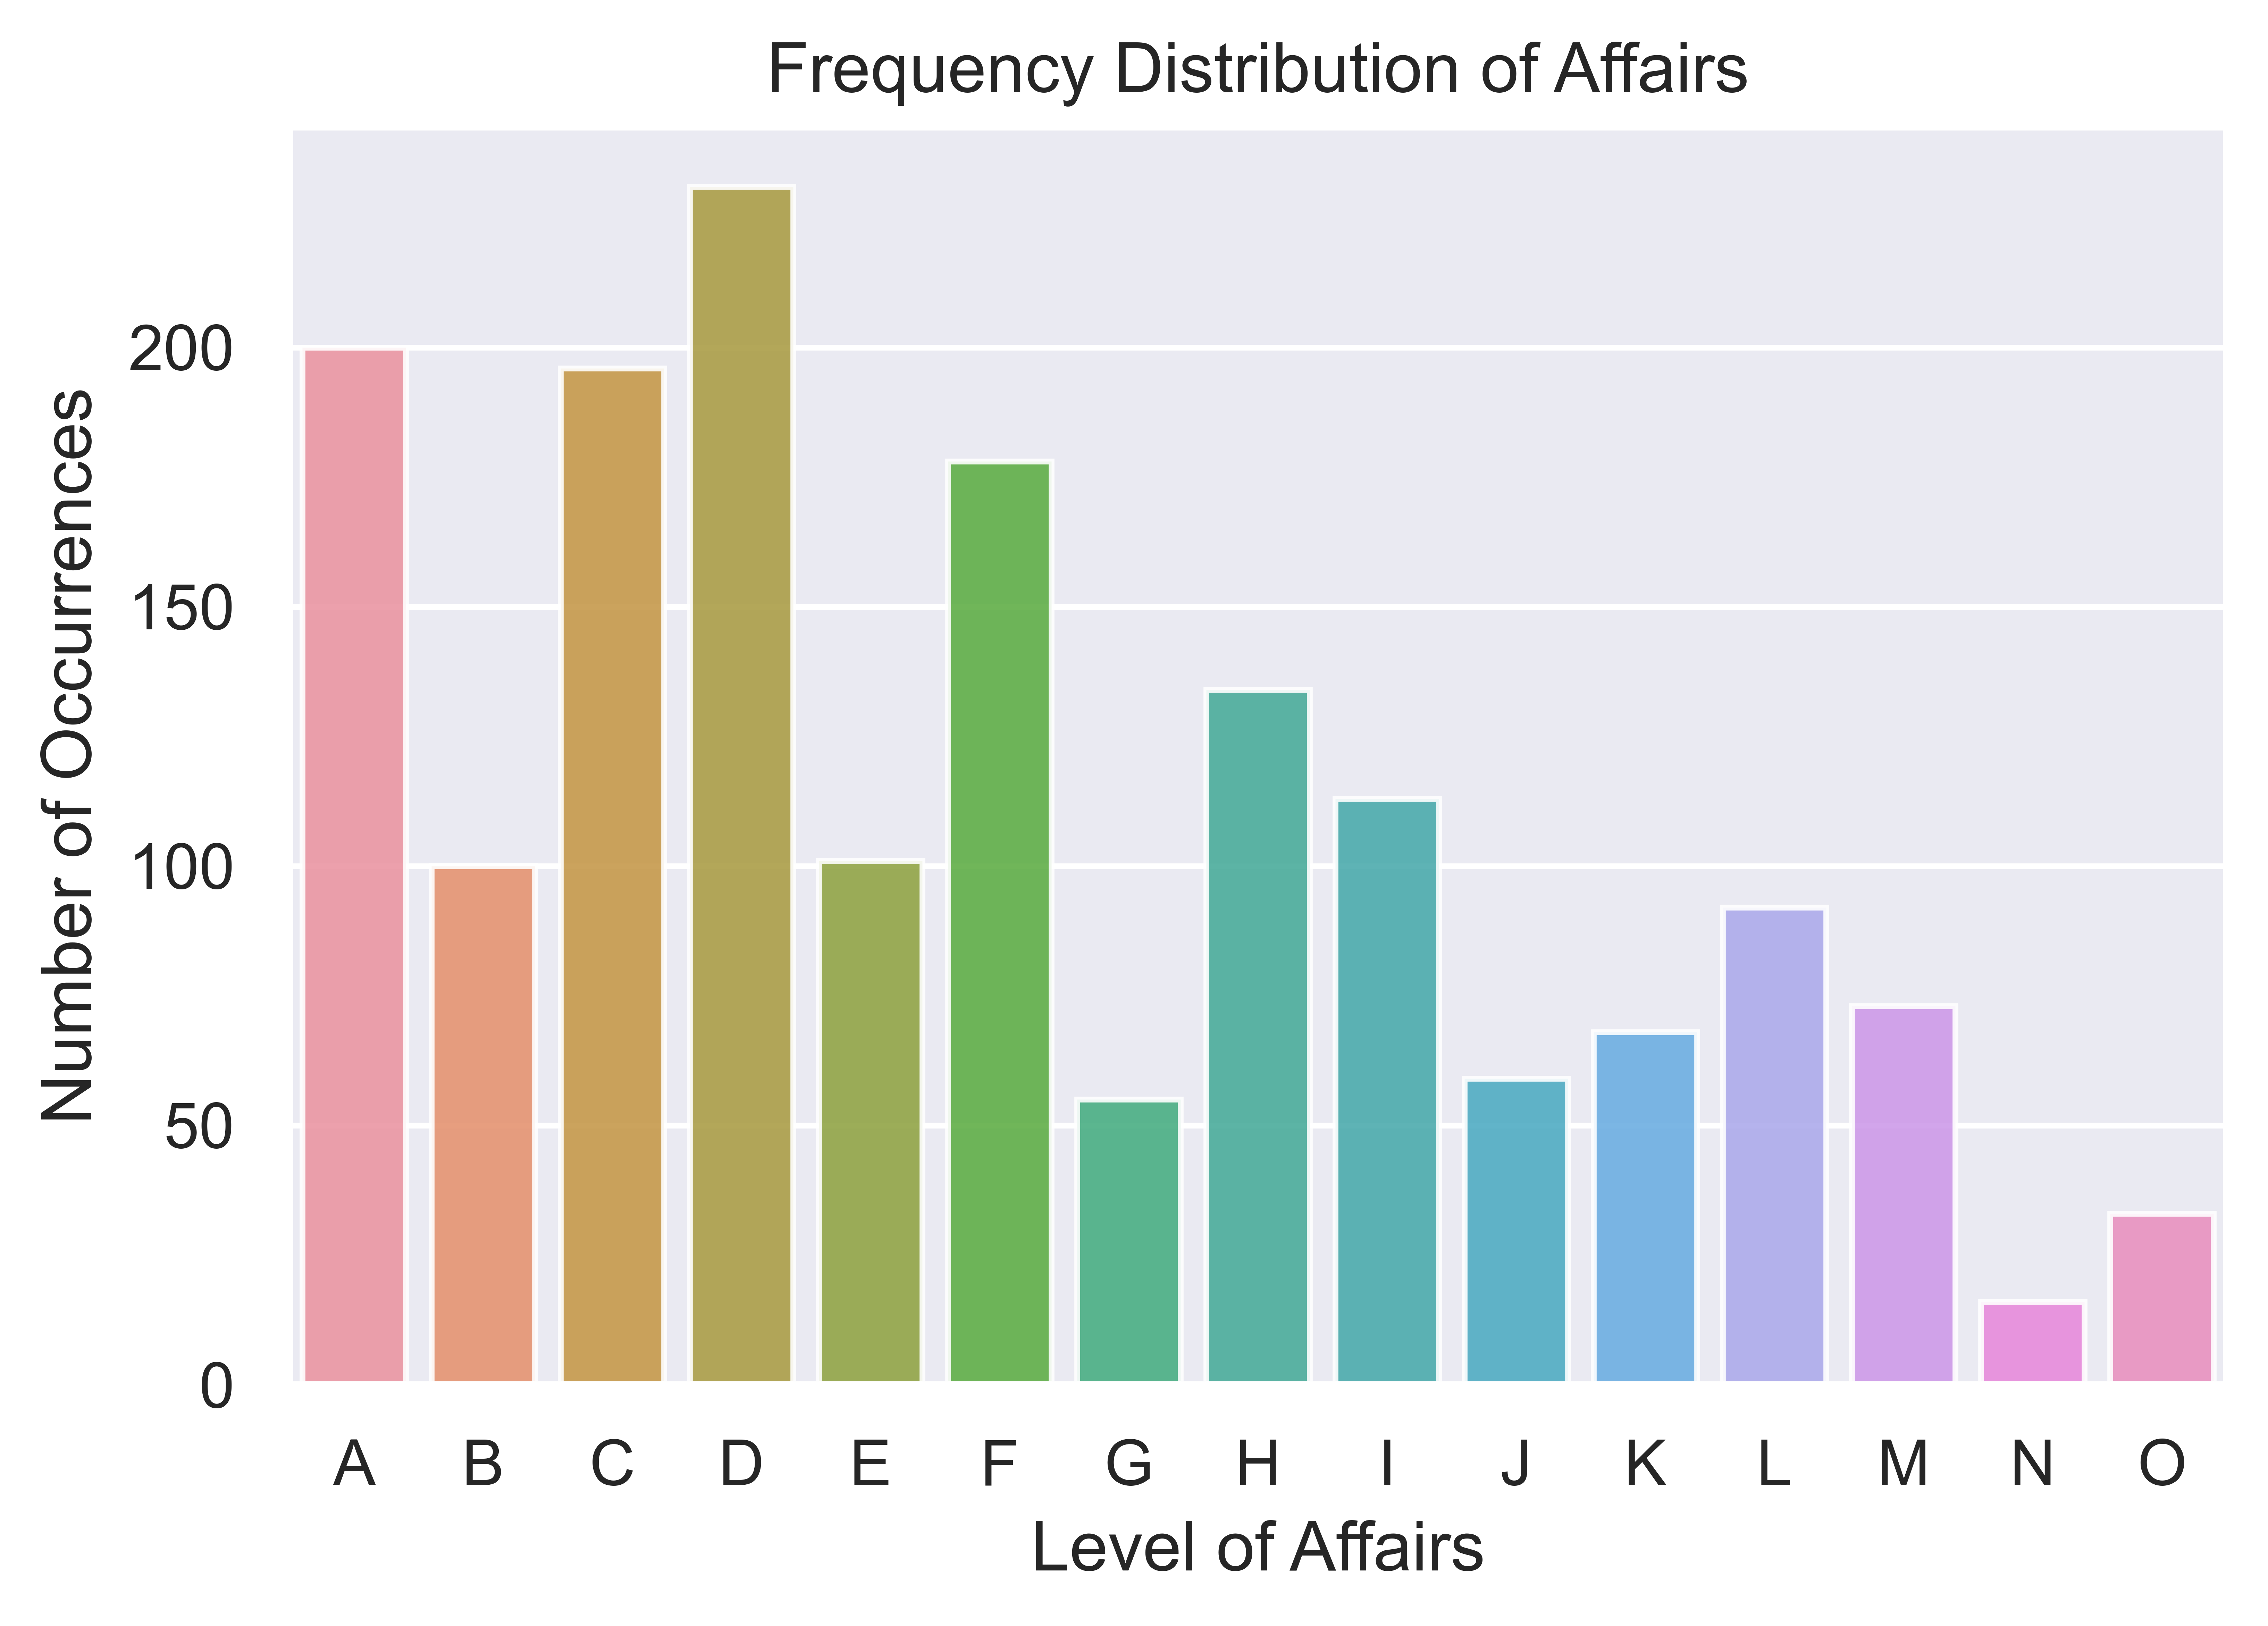

In [22]:
plt.figure(dpi=1200)
variable_count = Data['Affairs'].value_counts()
sns.set(style="darkgrid")
sns.barplot(variable_count.index, variable_count.values, alpha=0.9)
plt.title('Frequency Distribution of Affairs')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Level of Affairs', fontsize=12);
#plt.savefig('/media/sda6/Projects/Game Analysis/Stress.png')

/home/hamid/snap/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


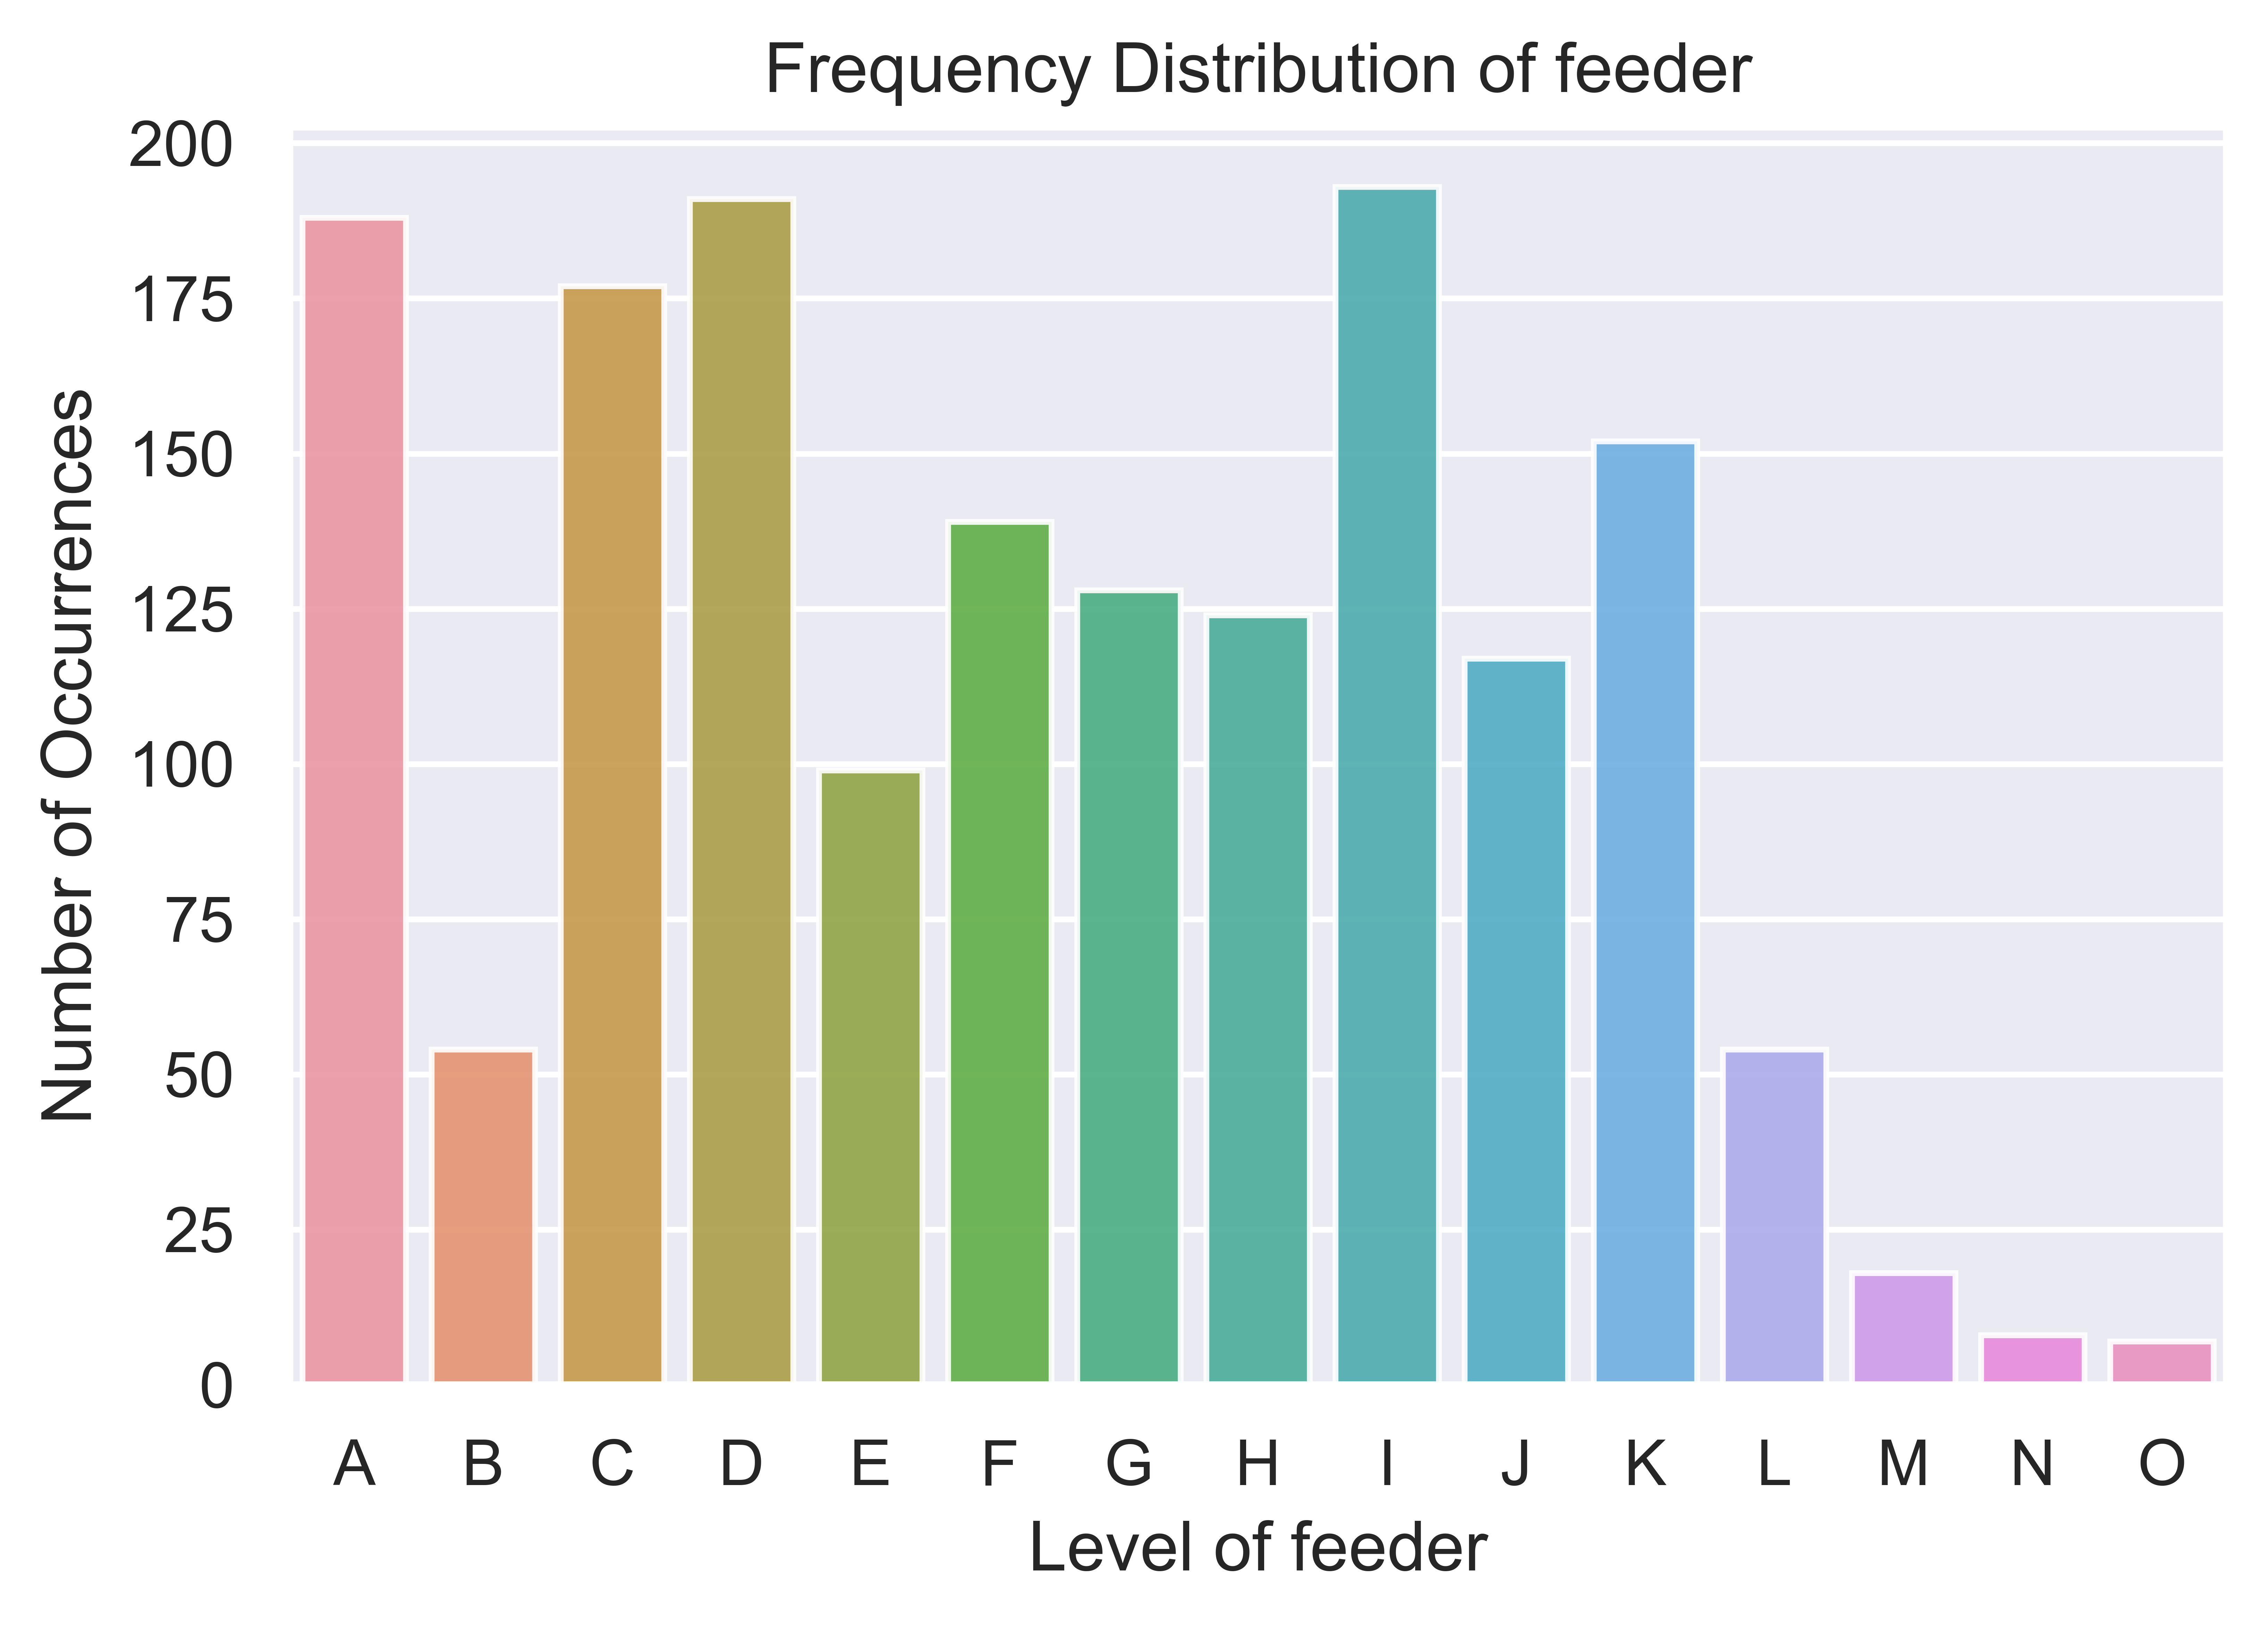

In [23]:
plt.figure(dpi=1200)
variable_count = Data['feeder'].value_counts()
sns.set(style="darkgrid")
sns.barplot(variable_count.index, variable_count.values, alpha=0.9)
plt.title('Frequency Distribution of feeder')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Level of feeder', fontsize=12);
#plt.savefig('/media/sda6/Projects/Game Analysis/Stress.png')

/home/hamid/snap/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


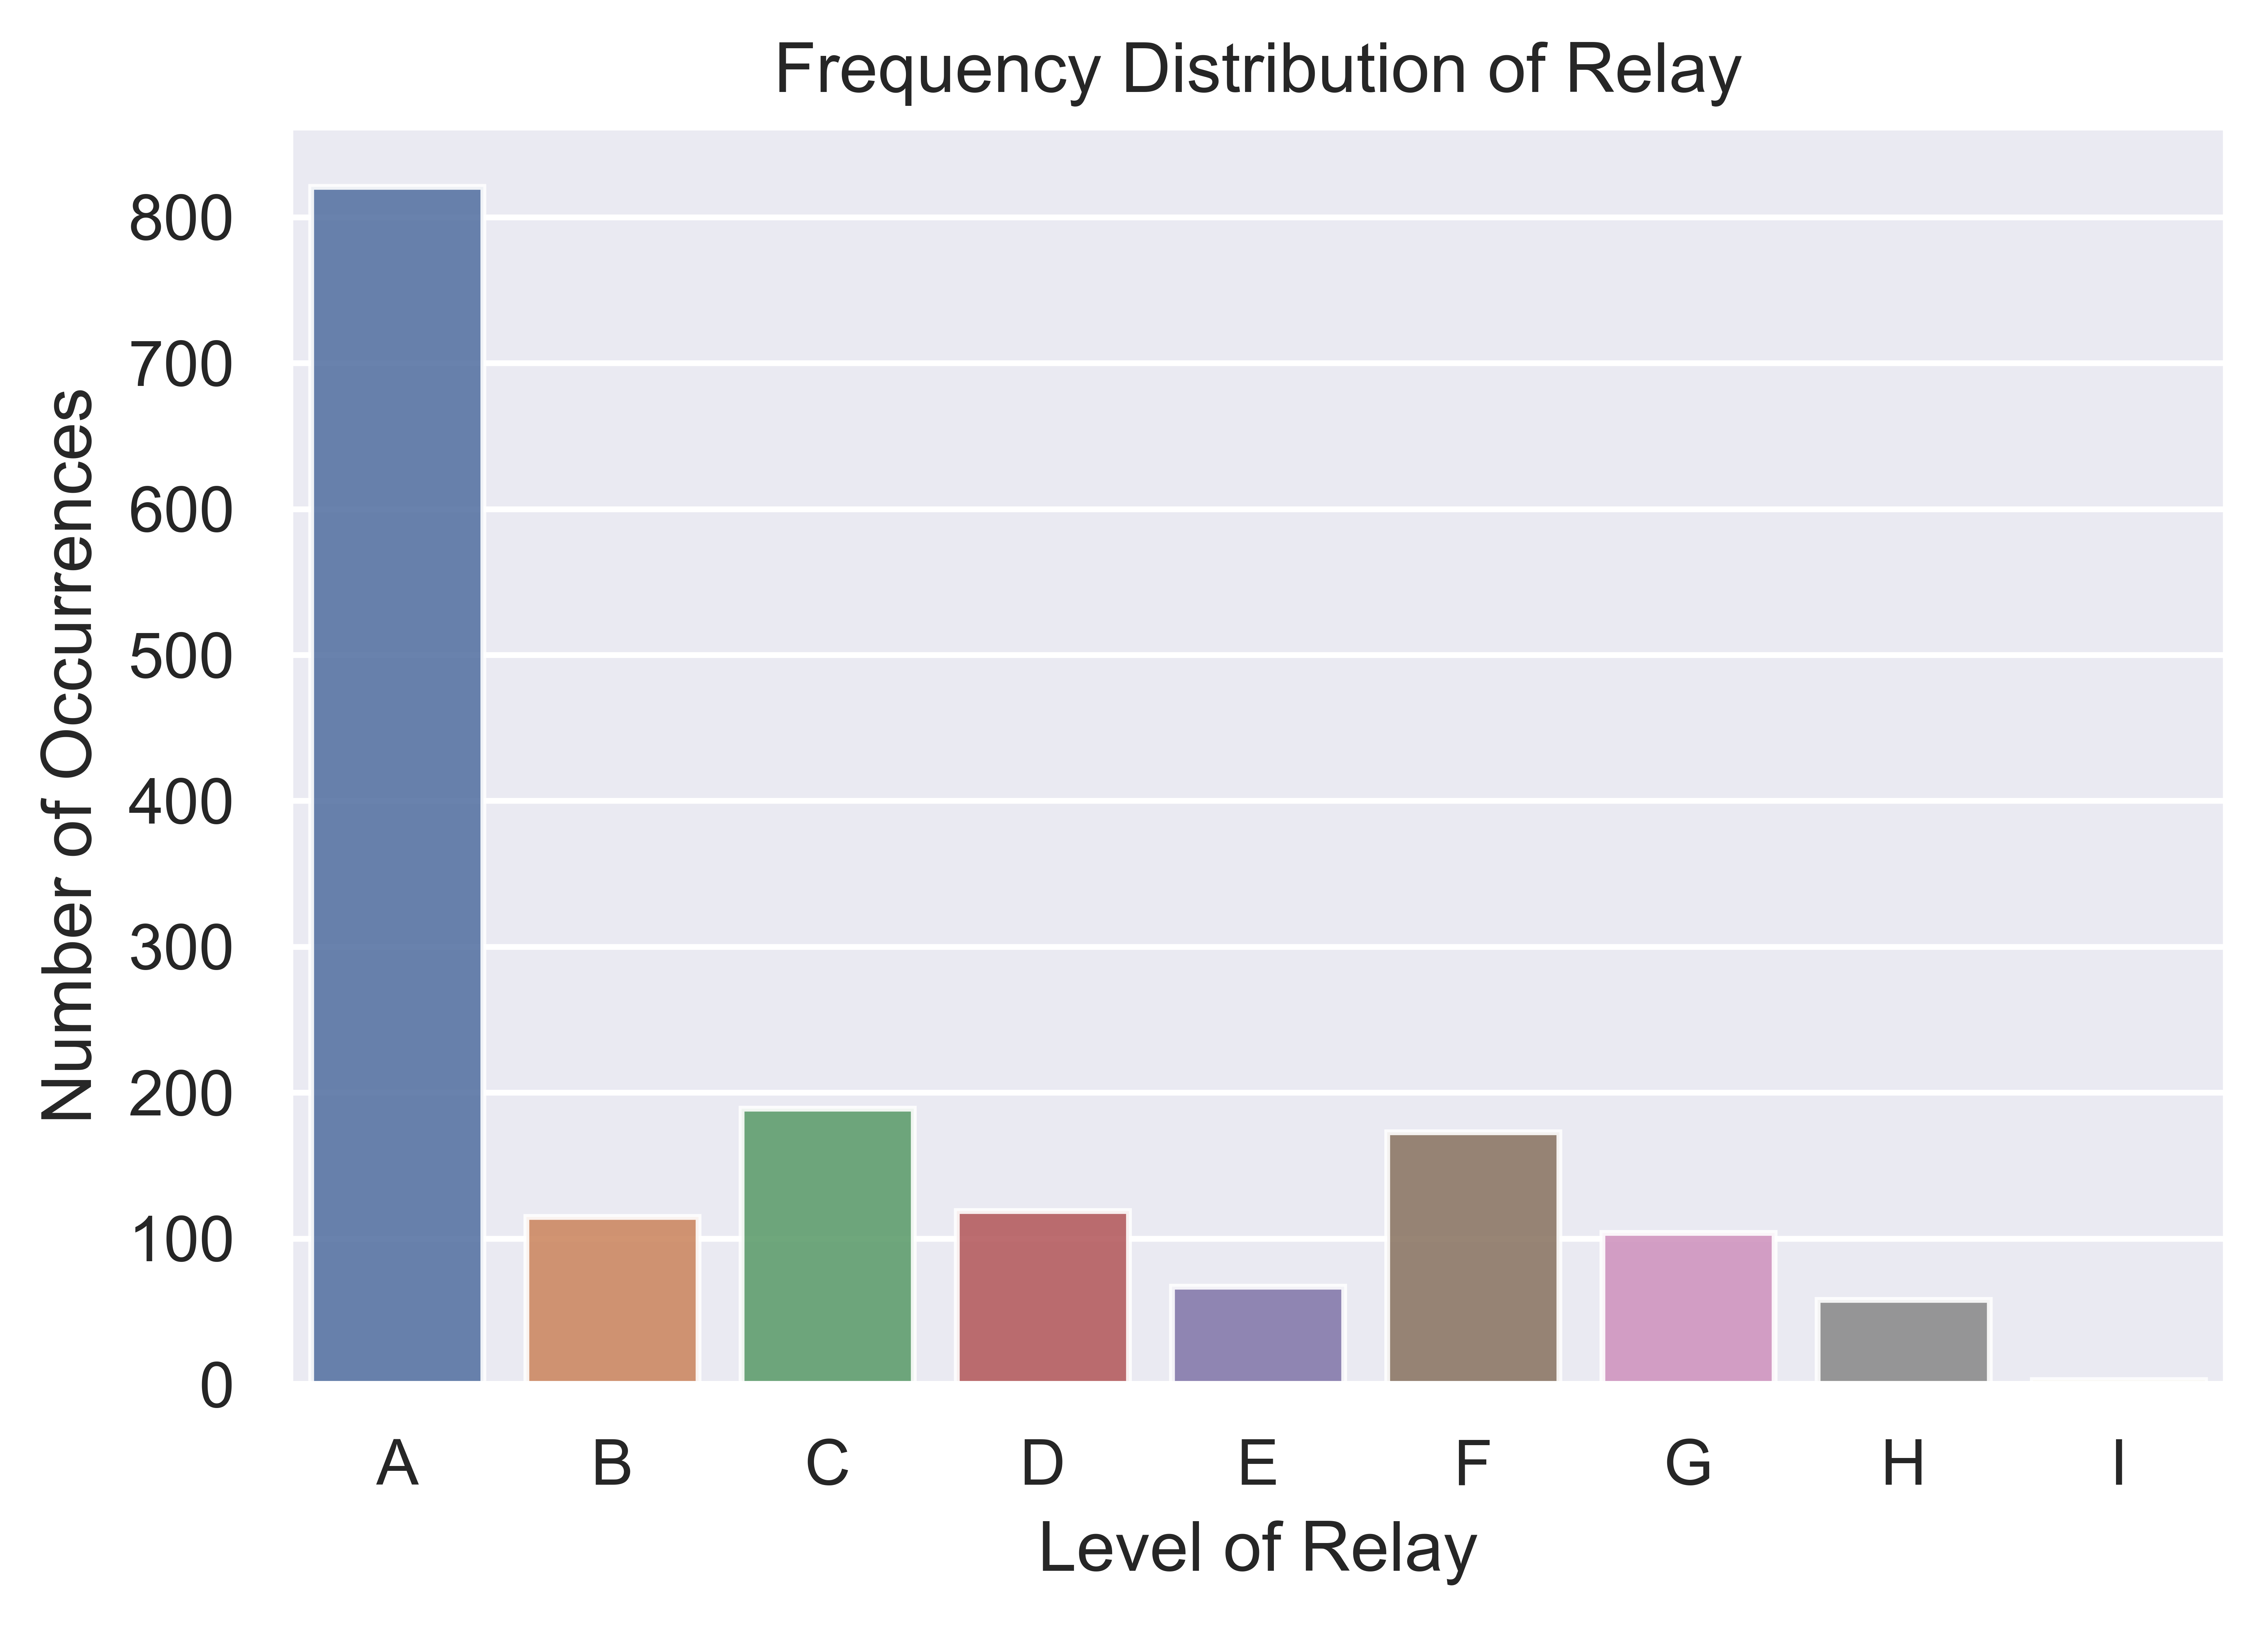

In [24]:
plt.figure(dpi=1200)
variable_count = Data['Relay'].value_counts()
sns.set(style="darkgrid")
sns.barplot(variable_count.index, variable_count.values, alpha=0.9)
plt.title('Frequency Distribution of Relay')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Level of Relay', fontsize=12);
#plt.savefig('/media/sda6/Projects/Game Analysis/Stress.png')

/home/hamid/snap/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


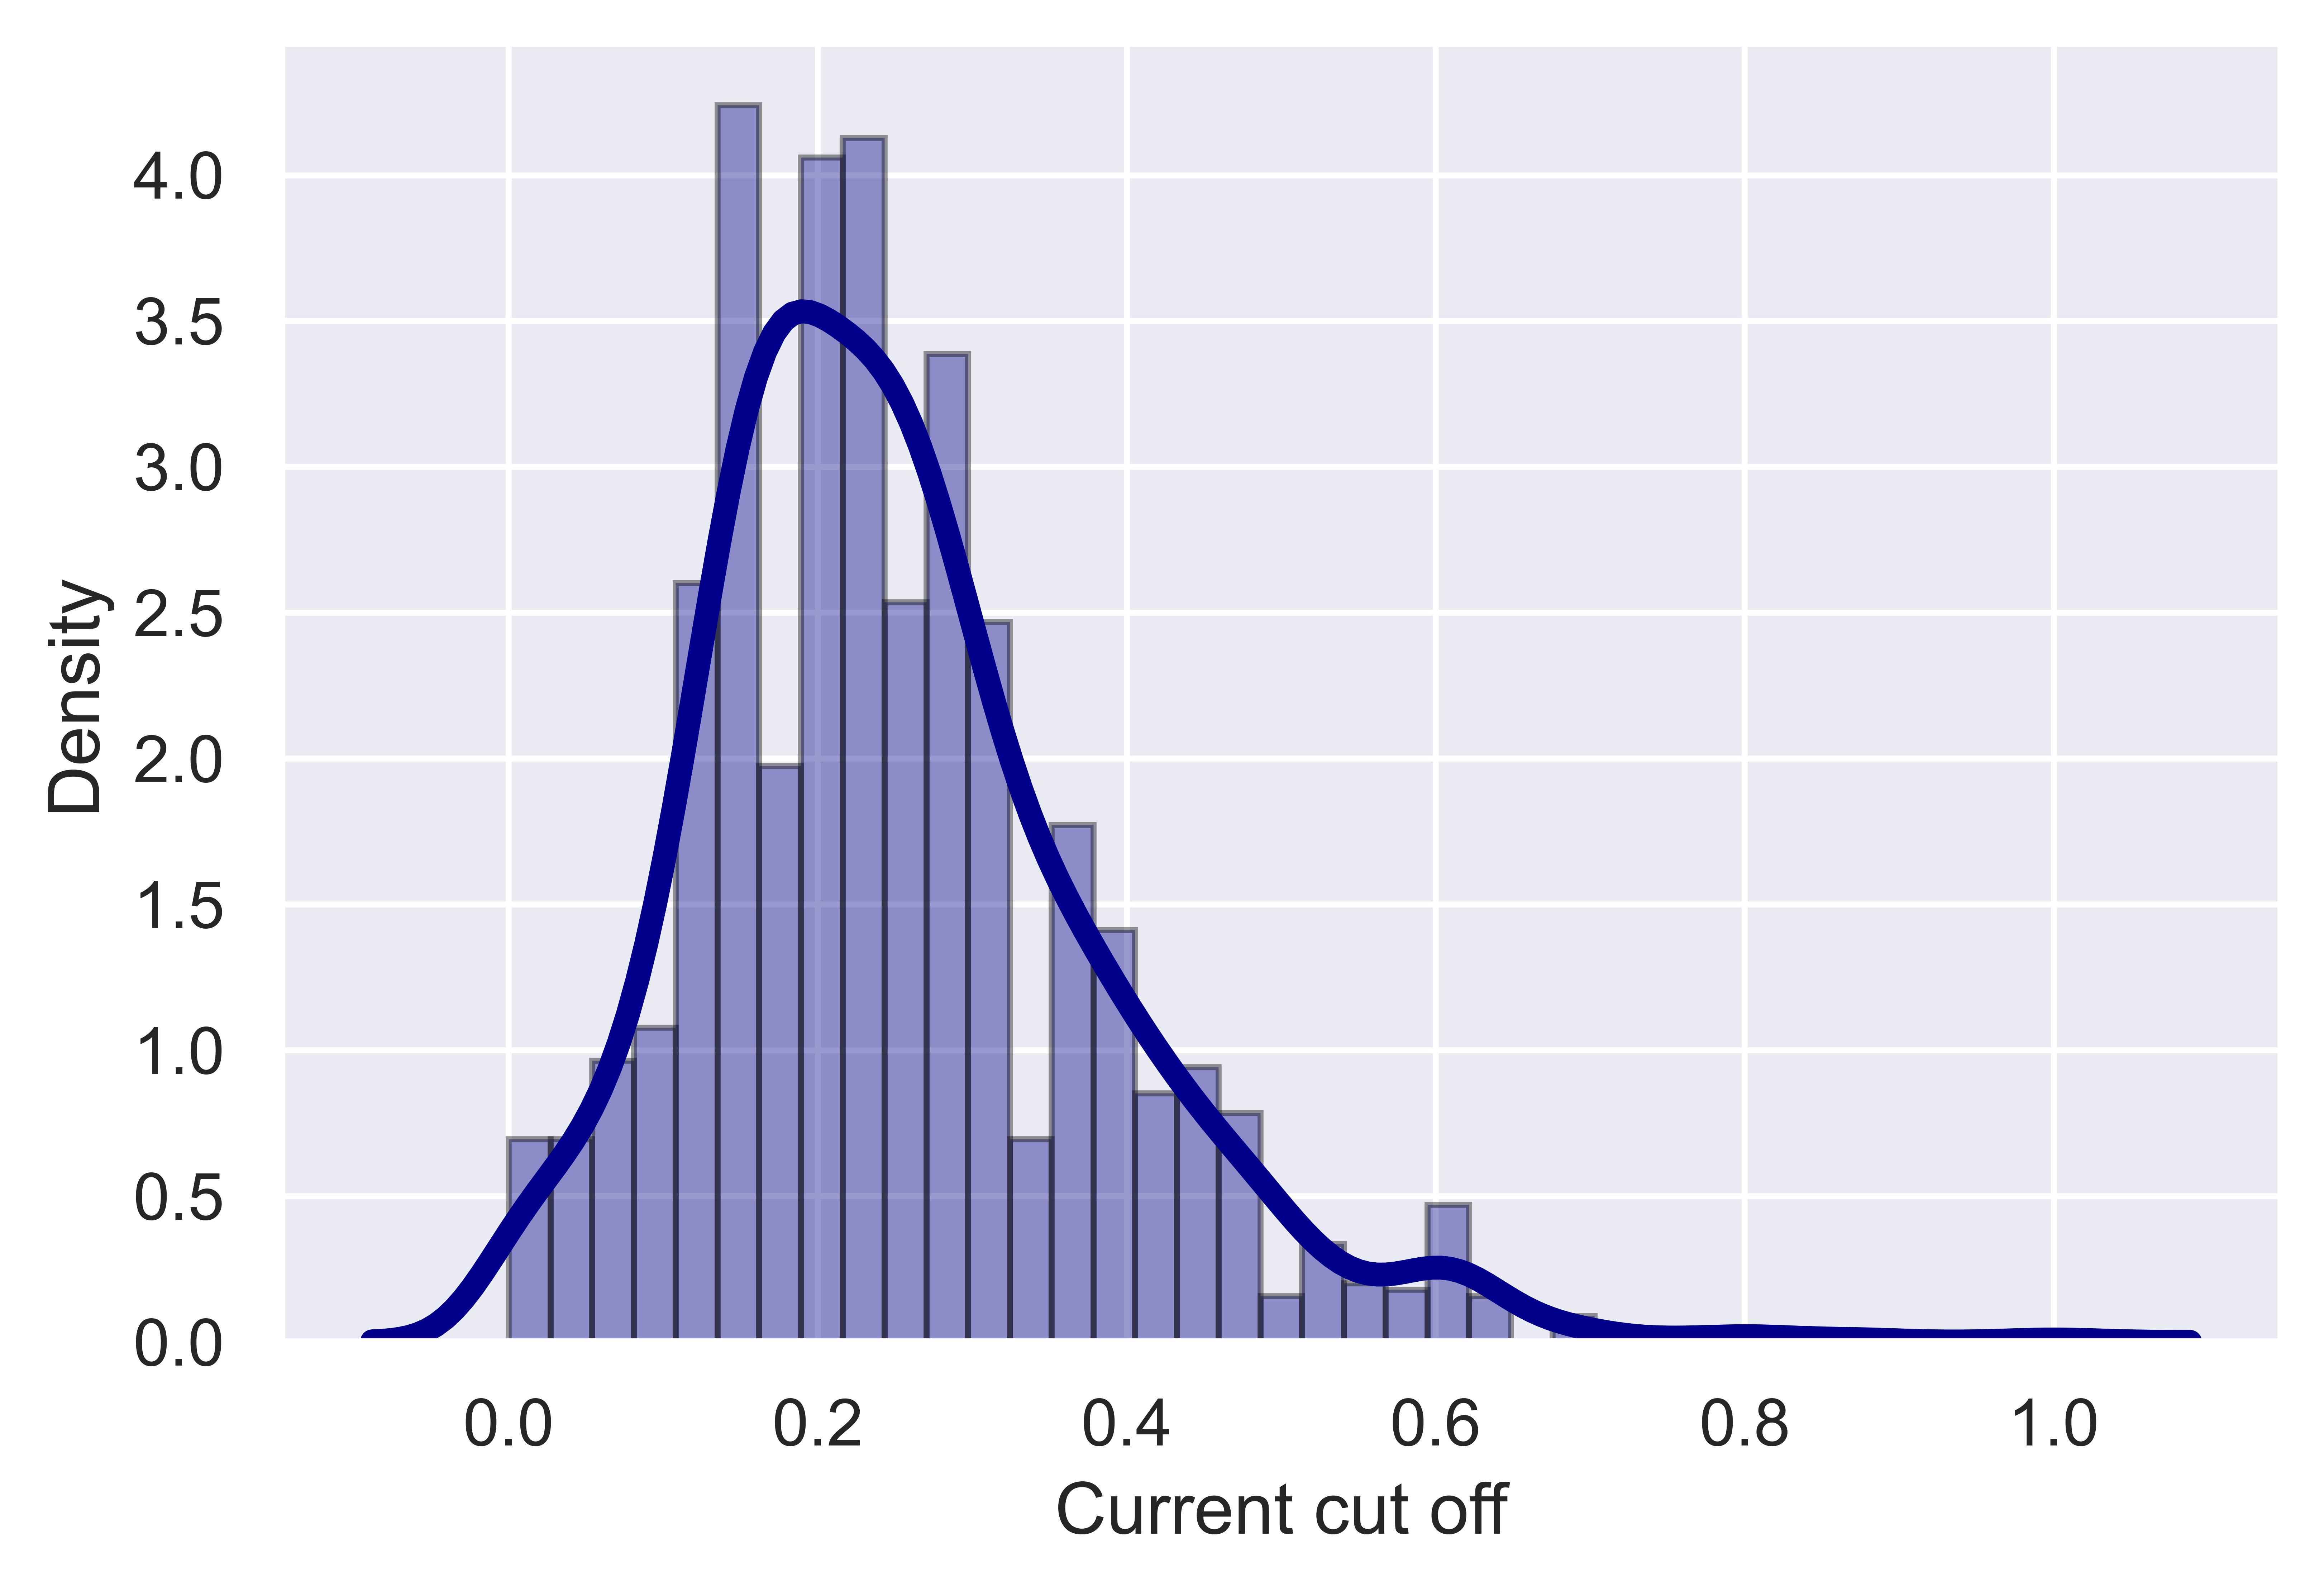

In [25]:
plt.figure(dpi=1200)
sns.distplot(Data['Current cut off'], hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4});

/home/hamid/snap/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


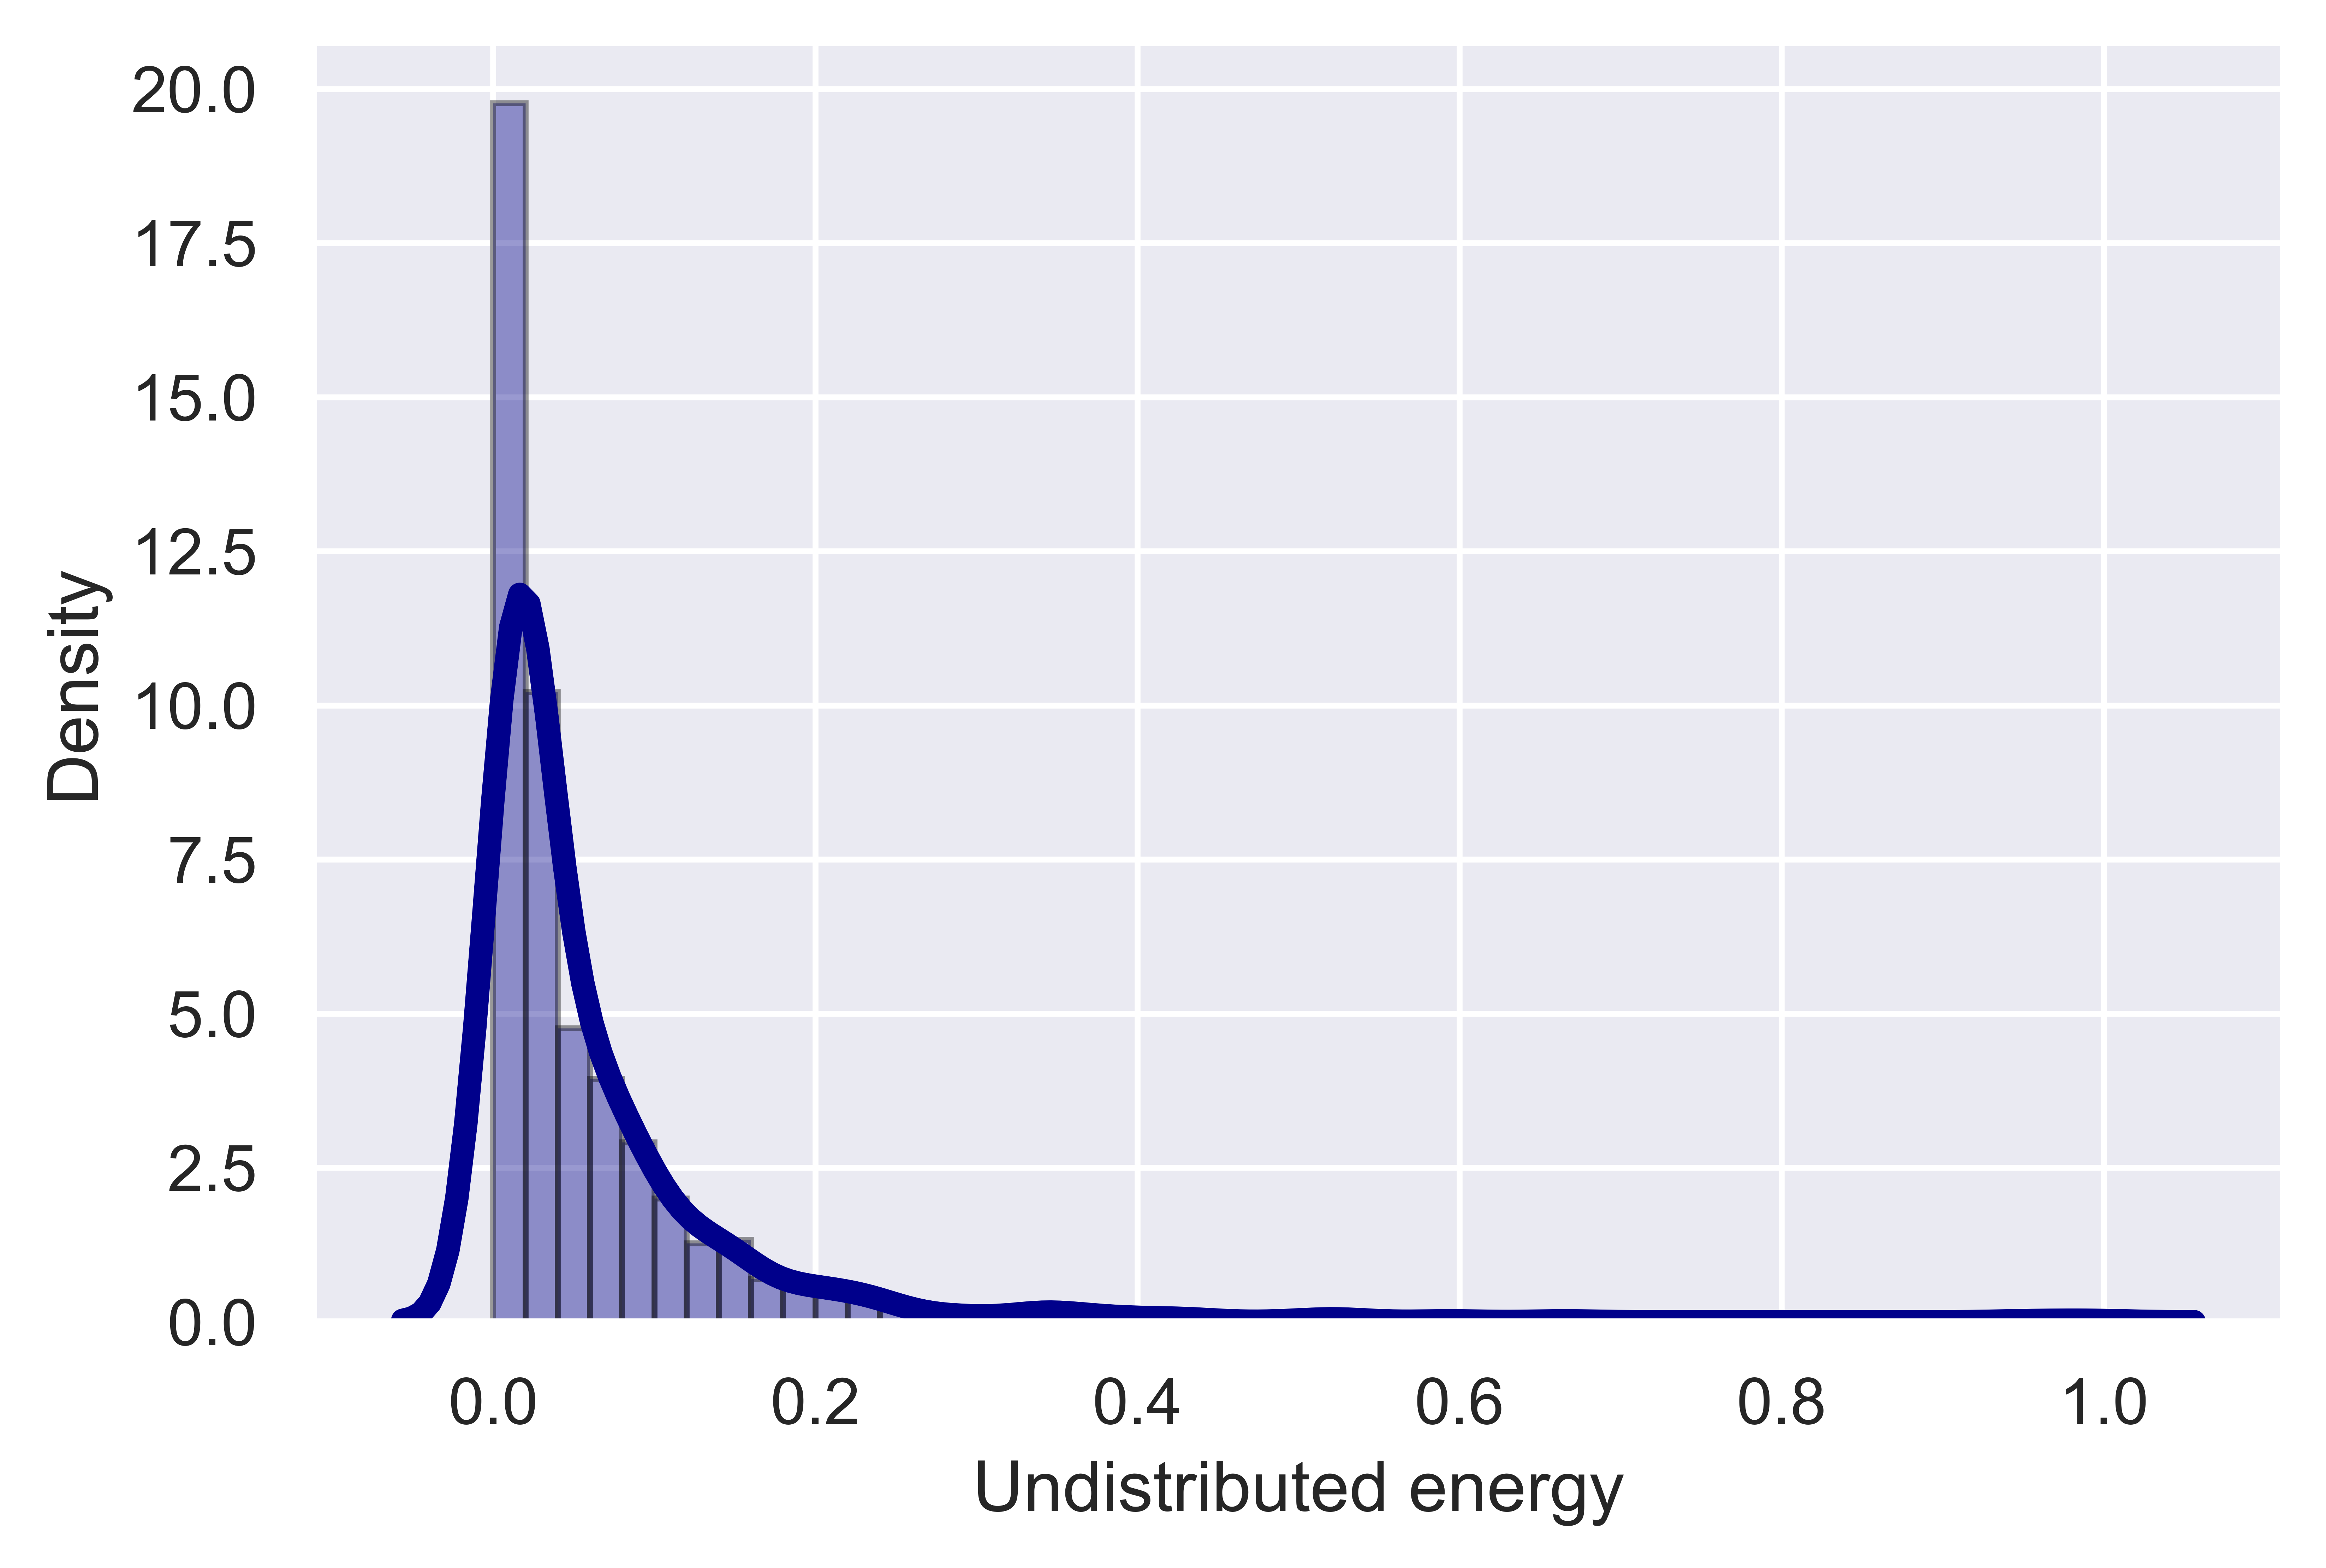

In [26]:
plt.figure(dpi=1200)
sns.distplot(Data['Undistributed energy'], hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4});